In [89]:
# Work with individual CSV files with binned ROI signals (Raw data already parsed and binned in MATLAB)

# OVERALL GOALS: Adjust valley detection parameters for ROI_Unknown1 to ensure only deeper valleys are counted
# Increasing prominence threshold and width to filter out shallow/noisy valleys

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths

# Create a base name for saving results (removes .csv extension if present)
# Load the ROI_Unknown1 file
#      Example filename = output_roi1_frame5_Z-43.7.csv
# path = '/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham rbc velocity/results/'

# filename = path + file

# out_base = os.path.splitext(filename)[0]

# Load the ROI_Unknown1 file
# path = '/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham rbc velocity/results/'
path1 = '/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham rbc velocity/results/'
path2 = '070825_pointscan_csvFiles/mht07_roiA/'
path3 = 'mht09_roiA1/'
path = path1+path3

# file = "output_roi1_frame2_Z-43.7.csv"
# file = "output_roi1_frame1_Z437.csv"
# file = "output_roi7_frame1_Z50.4.csv"
# file = "output_roi1_frame1_Z32.8.csv"
# file = "output_roi2_frame1_Z40.csv" #"output_roi1_frame1_Z20.csv"
file = "output_roi5_frame1_Z88.2.csv"
# file = file_tmp.replace('.','')
sampling_rate=1000 # (pointscan data @1kHz)
# file = "output_roi1_frame1_Z437.csv"
# roi_pathname = r'/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham leak analysis/results/'
# Example filename = output_roi1_frame5_Z-43.7.csv
filename = path + file
out_base = os.path.splitext(file)[0]
print(filename)
print(out_base)

/Users/jcoleman/Documents/--LARGE DATA--/#Pizzi/TBI-sham rbc velocity/results/mht09_roiA1/output_roi5_frame1_Z88.2.csv
output_roi5_frame1_Z88.2


In [90]:
# Check the signal processing steps for valley detection - eg smoothing, etc

# 1) Read the input CSV (single column) into a NumPy array
# signal = pd.read_csv(filename, header=None).iloc[:, 0].values
signal = pd.read_csv(filename, header=None).squeeze("columns")

signal_zeroed = signal-min(signal)

# 2) Trim ends and smooth the signal
# Trim start and end to remove outliers
# ???NOTE - should this be based on stdev of signal? ie detect extreme endpoints???
trim_fraction = 0.05  # Trim 5% from start and end
num_samples = len(signal)
trim_start = int(num_samples * trim_fraction)
trim_end = int(num_samples * (1 - trim_fraction))
trimmed_signal = signal[trim_start:trim_end].reset_index(drop=True)

# intensity_central = intensity[start_index:end_index]
intensity_central = trimmed_signal

# FFT to smooth the signal
fft_signal = np.fft.fft(intensity_central)
frequencies = np.fft.fftfreq(len(intensity_central))

# Filter: Zero out high frequencies (keep only low frequencies)
cutoff = 0.1# 0.02 # Adjust this value based on your data; Eg '0.1' for 1Hz g-g data
fft_signal[np.abs(frequencies) > cutoff] = 0

# Inverse FFT to get the smoothed signal
smoothed_signal = np.fft.ifft(fft_signal)

# # 2) Smooth the signal with a simple moving average
# smoothed_signal = np.convolve(signal, np.ones(window_size) / window_size, mode='same')

In [ ]:
# Plot raw signal and the smoothed overlay
# plt.plot(trimmed_signal[0:2000])
# plt.plot(smoothed_signal[0:2000])
plt.plot(trimmed_signal[0:2000], 'c-', label='Trimmed Signal Chunk')
plt.plot(smoothed_signal[0:2000], label='Smoothed Signal')
plt.legend()
plt.show()

In [ ]:
plt.plot(trimmed_signal, 'c-', label='Trimmed Signal')
plt.plot(smoothed_signal, 'b-', label='Smoothed Signal')
plt.legend()
plt.show()

/Users/jcoleman/miniforge3/envs/data_analysis_env/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/jcoleman/miniforge3/envs/data_analysis_env/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


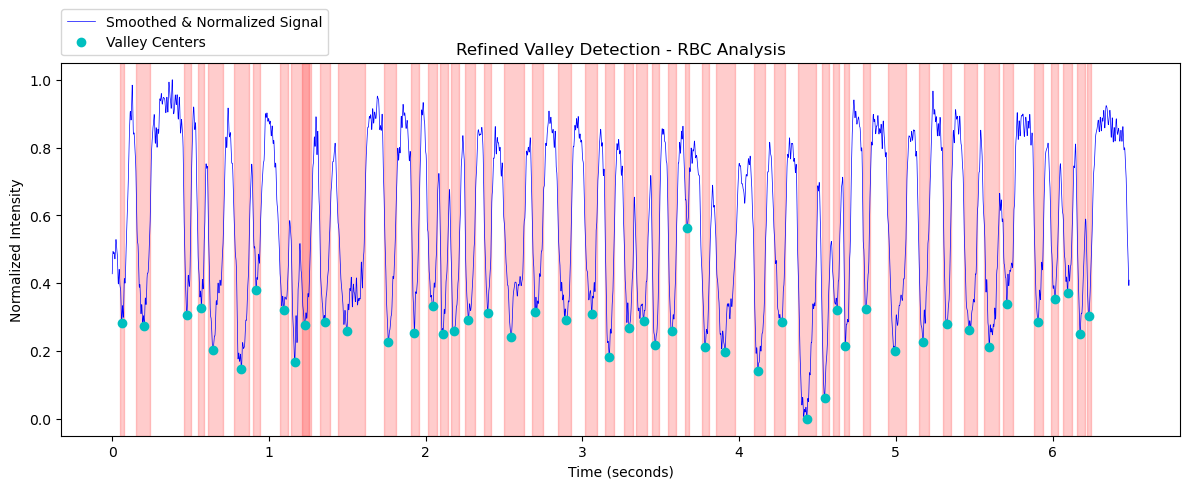

In [93]:
# --- ALT: Plot with Pink Valley Bars ---
time_axis = np.arange(len(norm_signal)) / sampling_rate  # time in seconds

plt.figure(figsize=(12, 5))
plt.plot(time_axis, norm_signal, 'b-', label="Smoothed & Normalized Signal", alpha=1, linewidth=0.5)
# plt.plot(time_axis[valleys], norm_signal[valleys], 'co', label="Valley Centers")
plt.plot(time_axis[peaks], norm_signal[peaks], 'co', label="Valley Centers")

# for start_idx, width_val in zip(widths_result[2], widths_result[0]):
#     left = time_axis[int(start_idx)]
#     right = time_axis[int(start_idx + width_val)]
#     plt.axvspan(left, right, color="red", alpha=0.2)
for start_idx, width_val in zip(widths_result[2], widths_result[0]):
    left_idx = int(start_idx)
    right_idx = int(start_idx + width_val)
    
    # Clamp to array bounds
    left_idx = max(0, min(left_idx, len(time_axis)-1))
    right_idx = max(0, min(right_idx, len(time_axis)-1))

    left = time_axis[left_idx]
    right = time_axis[right_idx]
    plt.axvspan(left, right, color="red", alpha=0.2)

plt.title("Refined Valley Detection - RBC Analysis")
plt.xlabel("Time (seconds)")
plt.ylabel("Normalized Intensity")
# plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.legend(loc='lower left', bbox_to_anchor=(0, 1.02), borderaxespad=0., ncol=1)
plt.tight_layout()

# Save refined detection figure
plt.savefig(f"{out_base}_valley_detectionBars.pdf")
plt.savefig(f"{out_base}_valley_detectionBars.png")
plt.savefig(f"{out_base}_valley_detectionBars.svg")
plt.show()

/Users/jcoleman/miniforge3/envs/data_analysis_env/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/Users/jcoleman/miniforge3/envs/data_analysis_env/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/jcoleman/miniforge3/envs/data_analysis_env/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


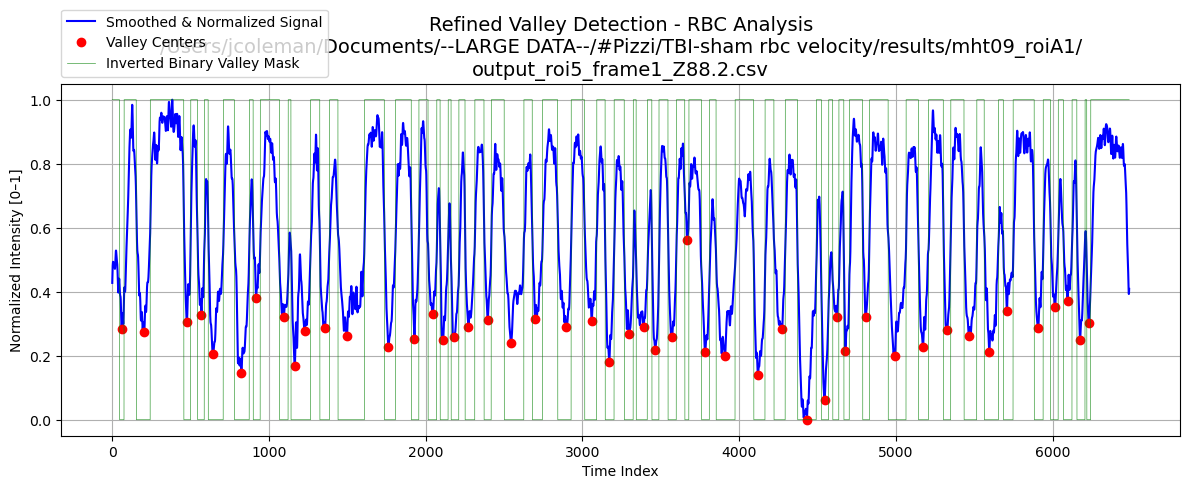

In [91]:
# Use smoothed signal from above to perform valley detection, and plot/CSV detected valleys with durations and save 

# ------------------------------------------------------------------
# Adjust these parameters as needed
# filename = "path/to/your_data.csv"
window_size = 10     # Window size for smoothing
min_prominence = 0.2
min_distance = 25#50
rbc_diameter_um = 6  # RBC diameter used in velocity calculations
# ------------------------------------------------------------------

# 3) Normalize to 0–1 for valley detection
norm_signal = (smoothed_signal - np.min(smoothed_signal)) / (np.max(smoothed_signal) - np.min(smoothed_signal))

# 4) Detect valleys by finding peaks in the inverted normalized signal
inverted = -norm_signal
peaks, props = find_peaks(
    inverted,
    prominence=min_prominence,
    distance=min_distance
)

# 5) Estimate widths at half-prominence
widths_result = peak_widths(inverted, peaks, rel_height=0.5)
peaks_widths = widths_result[0]  # duration of each valley in samples

# ---- Valley-Aligned Overlay Figure ----
plt.figure(figsize=(12, 5))
plt.plot(norm_signal, 'b-', label="Smoothed & Normalized Signal")
plt.plot(peaks, norm_signal[peaks], 'ro', label="Valley Centers")

# Generate a binary mask (0=not a valley, 1=valley region) from widths
square_wave = np.zeros_like(norm_signal)
for left_idx, right_idx in zip(widths_result[2], widths_result[3]):
    square_wave[int(left_idx):int(right_idx)] = 1
flipped_square = 1 - square_wave  # So that valleys are “LOW”

plt.plot(flipped_square, 'g-', linewidth=0.5, label="Inverted Binary Valley Mask", alpha=0.75)
plt.title(f"Refined Valley Detection - RBC Analysis\n{path}\n{file}", fontsize=14)
plt.xlabel("Time Index")
plt.ylabel("Normalized Intensity [0–1]")
# plt.legend()
# plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.legend(loc='lower left', bbox_to_anchor=(0, 1.02), borderaxespad=0., ncol=1)
plt.grid(True)
plt.tight_layout()

# Save overlay figure
plt.savefig(f"{out_base}_valley_overlayMask.pdf")
plt.savefig(f"{out_base}_valley_overlayMask.png")
plt.savefig(f"{out_base}_valley_overlayMask.svg")
plt.show()


In [92]:
# 5) Refined RBC Flux & Velocity Analysis on the smoothed (un‐normalized) signal
input_signal = norm_signal  # or use 'signal' if you prefer raw data

# Refined detection with stronger criteria
# Adjust these parameters as needed
# filename = "path/to/your_data.csv"
# window_size = 10     # Window size for smoothing
# min_prominence = 0.4 #0.2
# min_distance = 50 #5
# rbc_diameter_um = 6  # RBC diameter used in velocity calculations

# Detect valleys
inverted = -norm_signal
peaks, props = find_peaks(
    inverted,
    prominence=min_prominence,
    distance=min_distance
)

# Add widths manually
widths_result = peak_widths(inverted, peaks, rel_height=0.5)
props["widths"] = widths_result[0]

# print(props)

if len(peaks) > 0:
    # Convert the 'widths' (in data points) to fraction of total length => approximate time in seconds
    valley_durations_sec = props["widths"] / len(input_signal)

    # Velocity: RBC diameter (6 µm) / time
    # Convert µm to mm => divide by 1000
    individual_velocities = (rbc_diameter_um / valley_durations_sec) / 1000  # mm/sec

    # Tabulate per-valley velocities
    refined_velocity_results = pd.DataFrame({
        "Valley Index": range(1, len(peaks) + 1),
        "Velocity (mm/sec)": individual_velocities
    })

    # Summary
    refined_rbc_flux = len(peaks)
    refined_mean_velocity = individual_velocities.mean()
    refined_std_velocity = individual_velocities.std()

    refined_summary_df = pd.DataFrame([{
        "RBC Flux (valleys/sec)": refined_rbc_flux,
        "Mean RBC Velocity (mm/sec)": refined_mean_velocity,
        "Std Dev RBC Velocity (mm/sec)": refined_std_velocity
    }])

    # Print to console
    print("\n### Refined RBC Flux & Velocity Analysis ###")
    print(refined_summary_df.to_string(index=False))
    print("\n### Refined Per-Valley RBC Velocities ###")
    print(refined_velocity_results.to_string(index=False))

    # 6) Save results to CSV
    refined_velocity_results.to_csv(f"{path1 + out_base}_valley_velocities.csv", index=False)
    refined_summary_df.to_csv(f"{path1 + out_base}_valley_summary.csv", index=False)

print(path1 + out_base)


### Refined RBC Flux & Velocity Analysis ###
 RBC Flux (valleys/sec)  Mean RBC Velocity (mm/sec)  Std Dev RBC Velocity (mm/sec)
                     49                    0.695561                        0.27833

### Refined Per-Valley RBC Velocities ###
 Valley Index  Velocity (mm/sec)
            1           1.364759
            2           0.437458
            3           0.886968
            4           0.919989
            5           0.406423
            6           0.411902
            7           0.869424
            8           0.710131
            9           0.311467
           10           0.831932
           11           0.622406
           12           0.230737
           13           0.549448
           14           0.805698
           15           0.718217
           16           0.770313
           17           0.790727
           18           0.629552
           19           0.841334
           20           0.311316
           21           0.593093
           22      

/Users/jcoleman/miniforge3/envs/data_analysis_env/lib/python3.11/site-packages/scipy/signal/_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
